In [135]:
import pandas as pd

train = pd.read_csv('data/train.csv', sep=';')
test = pd.read_csv('data/test.csv', sep=';')

In [136]:
X_train = pd.read_csv('data/X_train.csv', sep=';')
X_test = pd.read_csv('data/X_test.csv', sep=';')
y_train = pd.read_csv('data/y_train.csv', sep=';')
y_test = pd.read_csv('data/y_test.csv', sep=';')

In [141]:
y_test.sort_values('ID').head()

,OrderQty,ID
25778,NaN,0
64454,NaN,0
103130,NaN,0
64455,NaN,1
103131,NaN,1


In [139]:
test.head()

,ID,SalOrg,Material,date
0,0,97LK,00IYcj,2017-04
1,1,97LK,00lqzT,2017-04
2,2,97LK,00MFcK,2017-04
3,3,97LK,00mt9e,2017-04
4,4,97LK,00Ok8y,2017-04


In [110]:
test = pd.read_csv('data/eval.csv', sep=',')

In [119]:
train.shape

(5595701, 41)

In [111]:
test.head()

,ID,SalOrg,Material,date
0,0,97LK,00IYcj,2017-04
1,1,97LK,00lqzT,2017-04
2,2,97LK,00MFcK,2017-04
3,3,97LK,00mt9e,2017-04
4,4,97LK,00Ok8y,2017-04


In [120]:
sorted(train.columns)

['Age_ZN_ZI_years',
 'Business',
 'CBO_CBO_Qty_Shortage',
 'COMP_PRICE_AVG',
 'COMP_PRICE_MAX',
 'COMP_PRICE_MIN',
 'Comp_reference_number',
 'DC',
 'DP_FAMILY_CODE',
 'First_MAD',
 'Gamma',
 'Gross_Weight',
 'Height',
 'ID',
 'ItemCat',
 'LT',
 'Length',
 'LogABC',
 'MOQ',
 'Manufacturer',
 'Material',
 'MktABC',
 'Month',
 'NEAREST_COMP_PRICE_MAX',
 'NEAREST_COMP_PRICE_MIN',
 'Name_Of_Competitor',
 'ORIGINAL_SUPPLIER',
 'OrderQty',
 'PL',
 'PRICE',
 'PRODUCT_STATUS',
 'Plant',
 'ROP',
 'SUBRANGE',
 'SafetyStk',
 'SalOrg',
 'Ship_To',
 'SubFct',
 'Volume',
 'Width',
 'ordre']

In [9]:
train.isnull().sum()

ID                              0
First_MAD                       0
SalOrg                          0
DC                              0
Ship_To                         0
ordre                           0
Plant                           0
Material                        0
ItemCat                         0
OrderQty                        0
LT                              1
LogABC                      20938
MOQ                             1
ROP                             1
SafetyStk                       1
PL                              0
MktABC                          0
SubFct                          0
Gross_Weight                    0
Length                          0
Width                           0
Height                          0
Volume                          0
Gamma                           0
Manufacturer                    0
Business                        0
Month                           0
CBO_CBO_Qty_Shortage      2871107
Age_ZN_ZI_years           3741938
DP_FAMILY_CODE

In [116]:
sample = train.sample(100000)

In [117]:
sample['median_OrderQty_material'] = pd.concat([
    g['OrderQty'].shift().rolling(min_periods=1, window=len(g)).median()
    for _, g in sample.groupby('Material')
])

In [118]:
sample

,ID,First_MAD,SalOrg,DC,Ship_To,ordre,Plant,Material,ItemCat,OrderQty,...,SUBRANGE,Comp_reference_number,Name_Of_Competitor,COMP_PRICE_MIN,COMP_PRICE_AVG,COMP_PRICE_MAX,PRICE,NEAREST_COMP_PRICE_MIN,NEAREST_COMP_PRICE_MAX,median
2093630,6607966,2012-06-06,97LK,1aVE,Sovawl,FPurbh,9O7Z,uiMN1x,lvOi,5,...,X5kJ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4108471,6925904,2016-01-22,OQfZ,TUiR,uiizqN,80cFEa,9O7Z,TChan4,lvOi,5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4291937,3590429,2016-12-30,yqSu,TUiR,ZUSFwm,HmRjrp,vP6T,Au7eIU,lvOi,1,...,yRHf,2.0,1.0,236.790,244.350000,251.910,247.4100,251.910,251.910,NaN
201787,6985715,2014-07-25,97LK,TUiR,D5BZSL,gRHuN4,9O7Z,RHpxiB,lvOi,1,...,vDOn,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5227229,1663951,2012-04-23,U12J,TUiR,8IlIWT,qM8vJ0,Cisr,pe1tb9,lvOi,1,...,KlUL,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3881291,4273167,2017-02-09,yqSu,TUiR,ZUSFwm,1AF9kF,vP6T,8ZkoqX,lvOi,1,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2981912,86241,2017-01-31,U12J,1aVE,1NAO37,RzCWPE,Cisr,uWyVzS,lvOi,1,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5472280,2847692,2013-05-07,yqSu,1aVE,DGJHZD,TrgSIw,vP6T,7VQd29,lvOi,10,...,5cy5,1.0,1.0,58.080,58.080000,58.080,57.7500,58.080,58.080,NaN
4707362,1940252,2014-03-28,U12J,TUiR,AR596B,AHfRvX,Cisr,epW2P0,lvOi,2,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3747706,3824747,2017-03-16,yqSu,TUiR,SL7MVK,aQuZoc,vP6T,YGroE7,lvOi,47,...,Xwa6,1.0,1.0,188.500,188.500000,188.500,154.7000,188.500,188.500,NaN


In [92]:
meds = sample.groupby('Material')['OrderQty'].median().to_frame()

In [93]:
meds

,OrderQty
Material,
00IYcj,1.0
00MFcK,1.0
00Ok8y,1.0
00lqzT,1.0
00mt9e,2.0
01f4Vq,1.0
02Hg4G,1.0
02jRc8,1.0
0355Np,1.0


In [87]:
sample['date'].dt.month

1228064    11
5169134     4
529792      2
57262       8
5053452    12
4382296     9
3788200     3
5513411    10
5040651     2
4633035     8
1793151     5
1493706     6
2786749     3
2606787     6
2459900     2
2735889    12
954736      1
3174532     3
3889070     6
3788003    12
2725207     5
3928483     5
726539     11
1781083     5
4273955     3
2945408     1
3690911     4
1371248     9
4153796     2
1699529     2
           ..
2286895     2
1154201     2
4782075     2
288996      9
5490385    10
5308327    12
1932034     4
1712366    11
2250691    11
3889982     1
997315     11
2420718     6
5406125     1
3782843     3
713971      1
274945      4
5560937     1
2350234    11
4043333    10
5132438    10
3867193     6
3972805     4
738465     11
5048710    12
5149352     1
235301     10
4469881    11
2597179     3
1221679     8
3194834    12
Name: date, Length: 100000, dtype: int64

In [ ]:
train

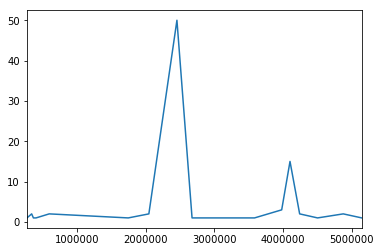

In [122]:
%matplotlib inline

sample[sample['Material'] == sample['Material'].unique()[19]].sort_index()['OrderQty'].plot()

In [8]:
import xam

cont_imp, disc_imp = xam.feature_selection.feature_importance_classification(X_train, y_train['Survived'], random_state=1)

cont_imp.sort_values('f_p_value')

,f_statistic,f_p_value,mutual_information
fare,63.030764,6.120189e-15,0.124183
age,3.761528,5.276069e-02,0.029486


In [10]:
disc_imp.sort_values('chi2_p_value')

,chi2_statistic,chi2_p_value,cramers_v,mutual_information
is_male,260.717020,1.197357e-58,0.540200,0.150870
p_class,102.888989,4.549252e-23,0.336684,0.058107
n_words_in_name,86.921615,5.296551e-16,0.299651,0.049138
family_size,80.672313,3.579669e-14,0.285735,0.047781
sib_sp,37.271793,1.558581e-06,0.187428,0.023197
parch,27.925784,9.703526e-05,0.156934,0.016366


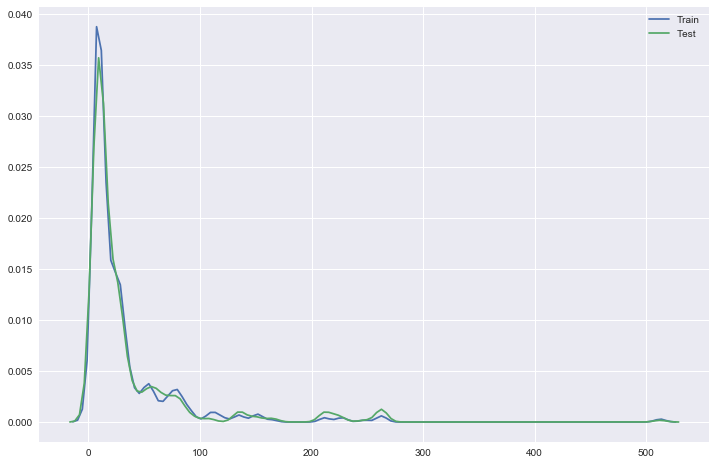

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig, ax = plt.subplots(figsize=[12, 8])

sns.kdeplot(X_train['fare'], label='Train', ax=ax)
sns.kdeplot(X_test['fare'], label='Test', ax=ax)
ax.legend();